In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv(r"E:\MCA\Minor project/Magicbricks.csv")
df1.head()


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df1.shape



(1259, 11)

In [4]:
df2 = df1.drop(['Furnishing','Status','Transaction','Type','Per_Sqft'],axis='columns')


In [5]:
df2.head()


,Area,BHK,Bathroom,Locality,Parking,Price
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000


In [6]:
 df2.isnull().sum()

Area         0
BHK          0
Bathroom     2
Locality     0
Parking     33
Price        0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

Area        0
BHK         0
Bathroom    0
Locality    0
Parking     0
Price       0
dtype: int64

In [8]:
df3.head()


,Area,BHK,Bathroom,Locality,Parking,Price
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000


In [9]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']/df4['Area']
df4.head()

,Area,BHK,Bathroom,Locality,Parking,Price,price_per_sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,8125.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6666.666667
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,16315.789474
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,7000.000000
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,9538.461538


In [10]:
df4.Locality.unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [11]:
len(df4.Locality.unique())

354

In [12]:
df4.Locality = df4.Locality.apply(lambda x: x.strip())
Locality_stats = df4.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
Locality_stats

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              33
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [13]:
len(Locality_stats[Locality_stats<=3])

274

In [14]:
Locality_stats_less_then_3 = Locality_stats[Locality_stats<=3]
Locality_stats_less_then_3

Locality
Guru Angad Nagar West, Laxmi Nagar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3
Indra Park Palam, Manglapuri                                                                                                                                                                                                                                                                                                                                                                                                                     

In [15]:
len(df4.Locality.unique())

354

In [16]:
df4.Locality = df4.Locality.apply(lambda x: 'other' if x in Locality_stats_less_then_3 else x )
len(df4.Locality.unique())

81

In [17]:
 df4.head(10)
    

,Area,BHK,Bathroom,Locality,Parking,Price,price_per_sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,8125.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6666.666667
2,950.0,2,2.0,other,1.0,15500000,16315.789474
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,7000.000000
4,650.0,2,2.0,other,1.0,6200000,9538.461538
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,11923.076923
6,1350.0,4,3.0,Rohini Sector 24,1.0,10000000,7407.407407
7,650.0,2,2.0,other,1.0,4000000,6153.846154
8,985.0,3,3.0,other,1.0,6800000,6903.553299
9,1300.0,4,4.0,other,1.0,15000000,11538.461538


In [18]:
df4.price_per_sqft.describe()

count      1226.000000
mean      14208.637179
std       14233.910912
min         204.081633
25%        6753.676471
50%       11666.666667
75%       17500.000000
max      178571.428571
Name: price_per_sqft, dtype: float64

In [20]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.Locality==Locality) & (df.BHK==2)]
    BHK3 = df[(df.Locality==Locality) & (df.BHK==3)]
    matplotlib.rcparams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.Area,BHK2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.Area,BHK3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("total area")
    plt.ylabel("price per sq feet")
    plt.title(Locality)
    plt.legend()
    
    plot_scatter_chart(df4,"Rohini Sector 24")
    plt.show()

Text(0, 0.5, 'count')

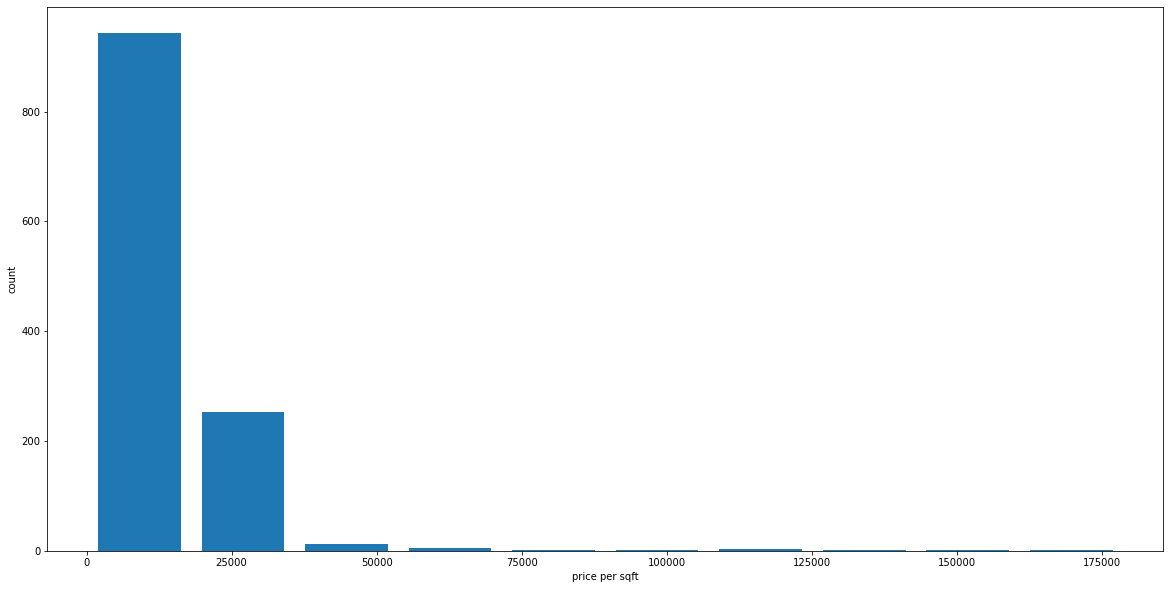

In [21]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

In [22]:
df4.Bathroom.unique()

array([2., 3., 4., 1., 5., 6., 7.])

In [28]:
df4[df4.Bathroom>5]

,Area,BHK,Bathroom,Locality,Parking,Price,price_per_sqft
225,5025.0,5,6.0,other,4.0,170000000,33830.845771
248,10350.0,4,7.0,"Maharani Bagh, New Friends Colony",3.0,160000000,15458.937198
495,5025.0,5,6.0,other,4.0,170000000,33830.845771
527,810.0,5,6.0,Geeta Colony,1.0,28900000,35679.012346
585,5500.0,6,7.0,Safdarjung Enclave,1.0,160000000,29090.909091
676,3112.0,5,6.0,Commonwealth Games Village 2010,3.0,60000000,19280.205656
681,2300.0,5,6.0,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,25217.391304
1029,5236.0,5,7.0,"The Amaryllis, Karol Bagh",3.0,73700000,14075.630252
1211,4350.0,4,6.0,other,2.0,135000000,31034.482759


Text(0, 0.5, 'count')

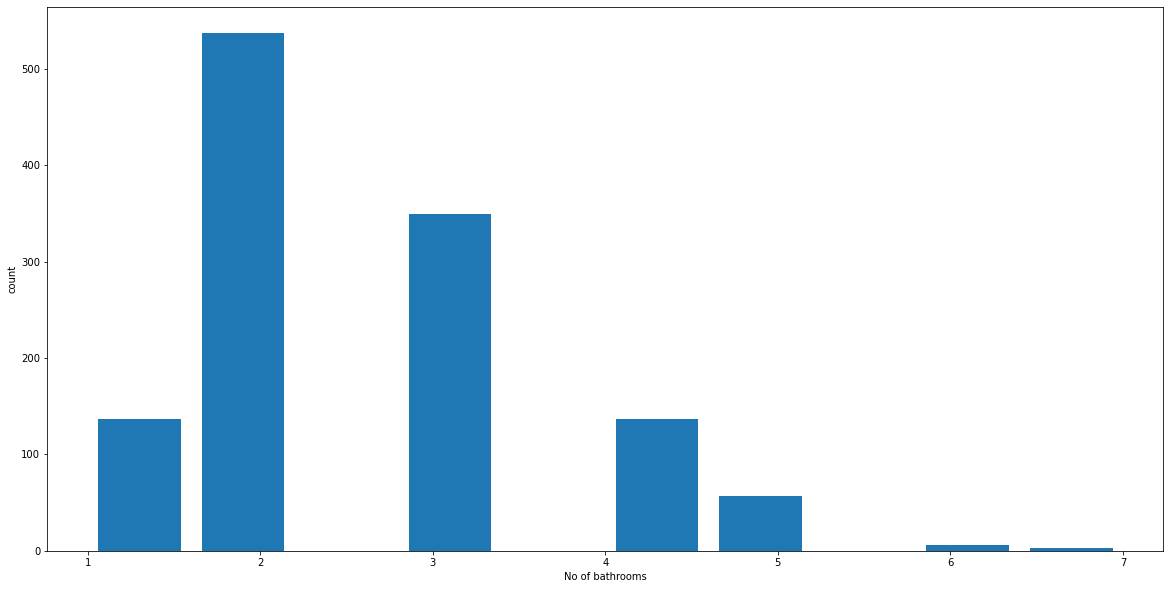

In [29]:
plt.hist(df4.Bathroom,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("count")

In [34]:
df5 = df4.drop(['price_per_sqft'],axis='columns')
df5.head()

,Area,BHK,Bathroom,Locality,Parking,Price
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000
2,950.0,2,2.0,other,1.0,15500000
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000
4,650.0,2,2.0,other,1.0,6200000


In [37]:
dummies =  pd.get_dummies(df5.Locality)
dummies.head()

,"Aashirwaad Chowk, Dwarka",Alaknanda,"Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave","Batla House, Okhla",Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,...,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head(5)

,Area,BHK,Bathroom,Locality,Parking,Price,"Aashirwaad Chowk, Dwarka",Alaknanda,"Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave",...,Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,other,1.0,15500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,other,1.0,6200000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df7 = df6.drop('Locality',axis='columns')
df7.head(3)

,Area,BHK,Bathroom,Parking,Price,"Aashirwaad Chowk, Dwarka",Alaknanda,"Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave","Batla House, Okhla",...,Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,800.0,3,2.0,1.0,6500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,1.0,5000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,1.0,15500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df7.shape


(1226, 85)

In [44]:
X = df7.drop('Price',axis='columns')
X.head()

,Area,BHK,Bathroom,Parking,"Aashirwaad Chowk, Dwarka",Alaknanda,"Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave","Batla House, Okhla",Budh Vihar,...,Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,800.0,3,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y = df7.Price
Y.head()

0     6500000
1     5000000
2    15500000
3     4200000
4     6200000
Name: Price, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.7065215482760583

In [51]:
X.columns

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Aashirwaad Chowk, Dwarka',
       'Alaknanda', 'Aravali Apartments, Alaknanda',
       'Arjun Nagar, Safdarjung Enclave', 'Batla House, Okhla', 'Budh Vihar',
       'Budh Vihar Phase 1', 'Chhattarpur', 'Chhattarpur Enclave Phase2',
       'Chittaranjan Park',
       'Common Wealth Games Village, Commonwealth Games Village 2010',
       'Commonwealth Games Village 2010',
       'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road',
       'DDA Lig Flats, Narela',
       'DLF Capital Greens, New Moti Nagar, Kirti Nagar',
       'Dilshad Colony, Dilshad Garden', 'Dilshad Garden', 'Dwarka Mor',
       'Geeta Colony', 'Geetanjali Enclave, Malviya Nagar',
       'Godrej South Estate, Okhla', 'Godrej South Estate, Okhla Phase 1',
       'Govindpuri Extension, Kalkaji', 'Greater Kailash 1', 'Hauz Khas',
       'Hauz Khas Enclave, Hauz Khas',
       'J R Designers Floors, Rohini Sector 24',
       'Kailash Colony, Greater Kailash', 'Kalkaji', 'Karol 

In [57]:
def predict_price(Locality,Area,Bathroom,BHK):
    loc_index = np.where(X.columns==Locality)[0]
    
    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bathroom
    x[2] = BHK
    if loc_index >=0:
        x[loc_index] = 1
        
        return lr_clf.predict([x])[0]


In [59]:
predict_price('Punjabi Bagh',1000,2,2)

14407667.355217613

In [60]:
predict_price('Greater Kailash 1',1200,2,3)

2205324.0369032733

In [66]:
predict_price('Patel Nagar West',800,1,2)

2653290.8316833265

In [67]:
import pickle
with open('delhi_realestate_price.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns= {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [70]:
predict_price('New Friends Colony',1000,2,3)

45746672.170287594